In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
airline = pd.read_csv('airline_passengers.csv', index_col='Month')
airline.dropna(inplace=True)
airline.index = pd.to_datetime(airline.index)

In [7]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [9]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()

In [10]:
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

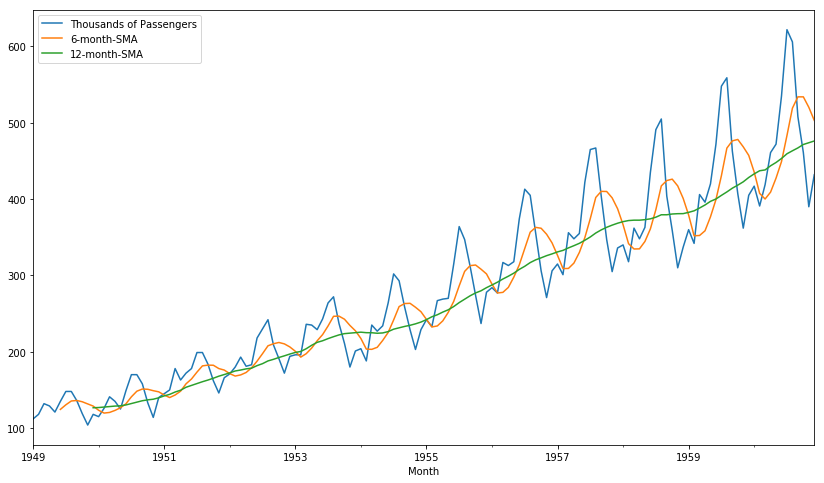

In [12]:
airline.plot(figsize=(14,8))

In [14]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

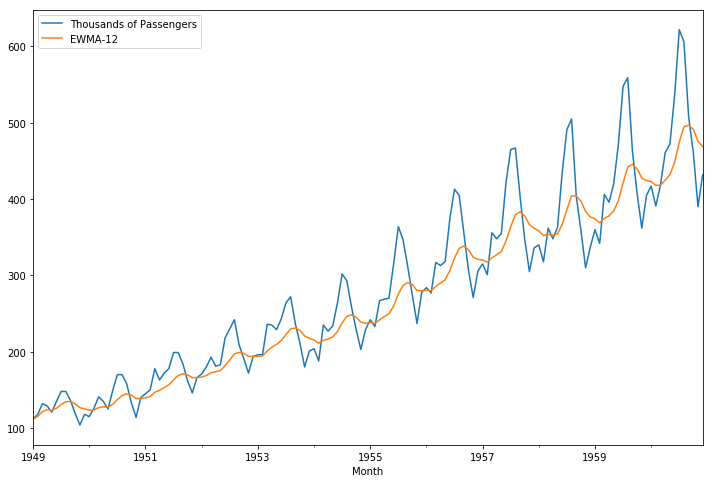

In [17]:
airline[['Thousands of Passengers', 'EWMA-12']].plot(figsize=(12,8))

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [19]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')

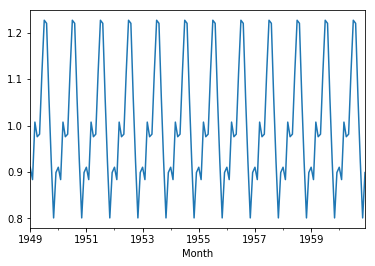

In [21]:
result.seasonal.plot()

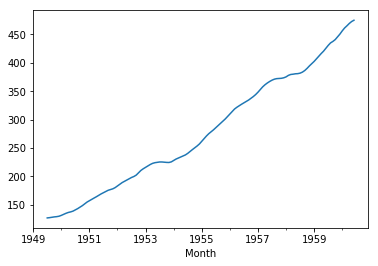

In [22]:
result.trend.plot()

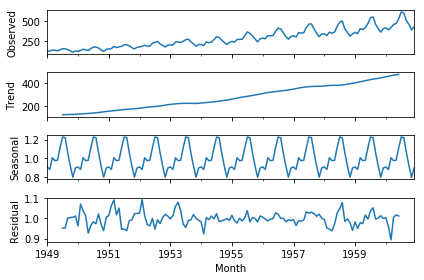

In [26]:
fig = result.plot()